# Imports
All the essential imports needed by the notebook to run successfully.

In [1]:
from matplotlib import  pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE 

# Read CSV file

In [2]:
data=pd.read_csv(os.path.join(".","neo.csv"))

# Download CSV file from github (Optional)

In [3]:
#data = pd.read_csv("https://raw.githubusercontent.com/KewlShubh/NASA-Collision-Detection/main/neo.csv")

# Having a peek at the data

In [4]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# Data Types and other information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


## Correlation
tells how much each attribute correlates with "hazardous" attribute

In [7]:
# Correlation Between Hazardous column and other columns.
corr_matrix = data.corr()
corr_matrix["hazardous"].sort_values(ascending=False)

hazardous             1.000000
relative_velocity     0.191185
est_diameter_max      0.183363
est_diameter_min      0.183363
miss_distance         0.042302
id                   -0.123443
absolute_magnitude   -0.365267
sentry_object              NaN
Name: hazardous, dtype: float64

# Data cleaning

## Overcoming Imbalance Issues

<AxesSubplot:ylabel='Type'>

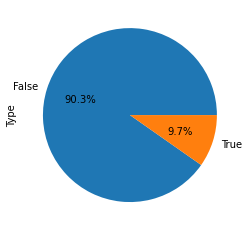

In [8]:
data.groupby('hazardous').size().plot(kind='pie',
                                       y = "hazardous",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [9]:
object_true = data[data["hazardous"] == True]
object_false  = data[data["hazardous"] == False]

In [10]:
print(object_true.shape)
print(object_false.shape)

(8840, 10)
(81996, 10)


### Resampling

In [11]:
from sklearn.utils import resample
object_false_downsample = resample(object_false,
             replace=True,
             n_samples=len(object_true),
             random_state=42)

print(object_false_downsample.shape)

(8840, 10)


In [12]:
data_downsampled = pd.concat([object_false_downsample, object_true])

<AxesSubplot:ylabel='Type'>

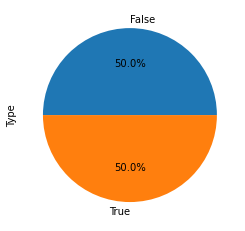

In [13]:
data_downsampled.groupby('hazardous').size().plot(kind='pie',
                                       y = "hazardous",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Dropping irrelevant features

In [14]:
# Dropping the irrelavant feature
X = data.drop(['id','name','orbiting_body','sentry_object','hazardous'],axis=1)
print(X.shape)

(90836, 5)


## Separating label from attributes

In [15]:
Y = LabelEncoder()
y = data['hazardous']
Y = Y.fit_transform(y)
print(Y)

[0 1 0 ... 0 0 0]


## Overcoming Imbalance Issues

In [16]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({False: 81996, True: 8840})


### Using SMOTE

To oversample the dataset

In [17]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [18]:
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({False: 81996, True: 8840})


# Creating training set and test set

In [20]:
# Splitting the data in to train test
X_train,x_test,Y_train,y_test=train_test_split(X_res, y_res,test_size=0.5)
X_train_reg,x_test_reg,Y_train_reg,y_test_reg=train_test_split(X, y,test_size=0.5)

# Fitting Decision Tree Model

In [21]:
# Fitting in to the Decision Tree model
model_DTC=DecisionTreeClassifier()
#print(model_DTC)
model_DTC.fit(X_train,Y_train)
prediction = model_DTC.predict(x_test)
print(prediction)
print(y_test)

[ True  True False ... False  True  True]
115328     True
157203     True
53313     False
12637     False
84644     False
          ...  
77358     False
126517     True
81990      True
94499      True
56247     False
Name: hazardous, Length: 81996, dtype: bool


In [22]:
# To check the accuracy
accuracy= model_DTC.score(x_test,y_test)
print(accuracy)

0.9336918874091419


In [23]:
# Confusion matrix
#print(prediction)
#print(y_test)

confusion_model= pd.crosstab(prediction,y_test)
print(confusion_model)
print(classification_report(y_test,prediction))

hazardous  False   True
row_0                  
False      38285   2726
True        2711  38274
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     40996
        True       0.93      0.93      0.93     41000

    accuracy                           0.93     81996
   macro avg       0.93      0.93      0.93     81996
weighted avg       0.93      0.93      0.93     81996



In [24]:
#improvement in accuracy

# Data Visualization

## Univariate Analysis
In univariate analysis only one variable is involved and is one of the simplest form to analyze the data.

#### Histogram for each attribute

array([[<AxesSubplot:title={'center':'est_diameter_min'}>,
        <AxesSubplot:title={'center':'est_diameter_max'}>],
       [<AxesSubplot:title={'center':'relative_velocity'}>,
        <AxesSubplot:title={'center':'miss_distance'}>],
       [<AxesSubplot:title={'center':'absolute_magnitude'}>,
        <AxesSubplot:>]], dtype=object)

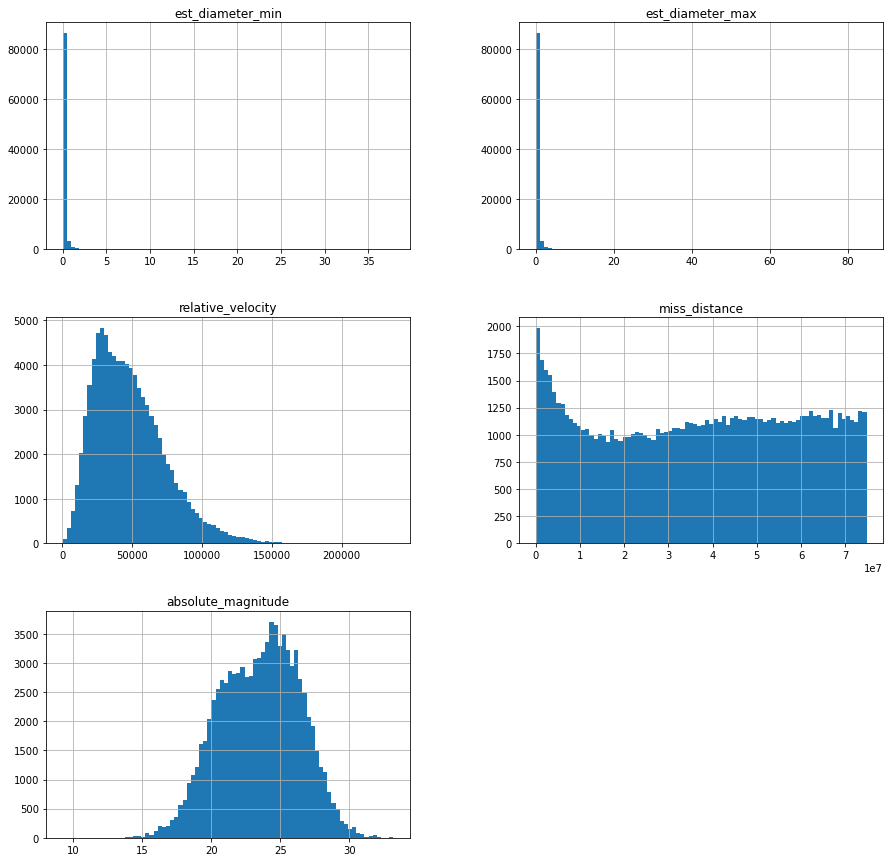

In [25]:
# Histogram
%matplotlib inline
X.hist(bins=80, figsize=(15,15))

#### Scatter graph for each attribute showing distribution of hazardous planets.

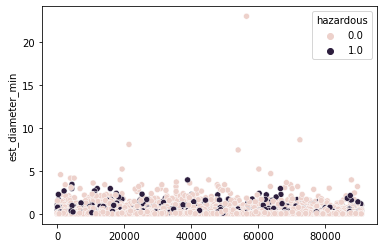

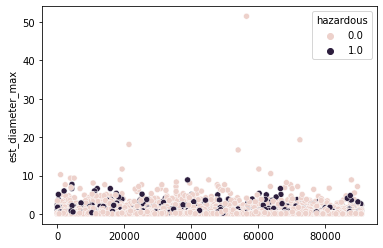

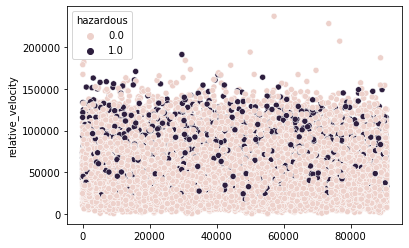

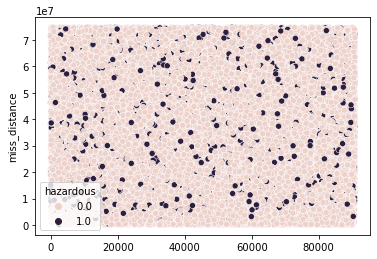

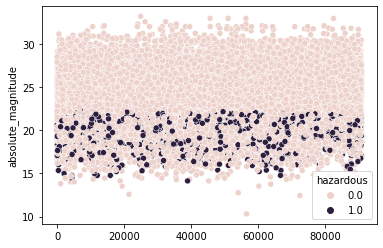

In [26]:
X_train_with_hazardous = X_train.copy()
X_train_with_hazardous['hazardous'] = y
for i, col in enumerate(X_train.columns):
    plt.figure(i)
    sns.scatterplot(x=X_train.index, y=X_train_with_hazardous[col], hue=X_train_with_hazardous['hazardous'])
plt.show()

## Bivariate Analysis
In bivariate analysis, two variables are involved and is typically used to find correlations and compare two attributes in dataset.

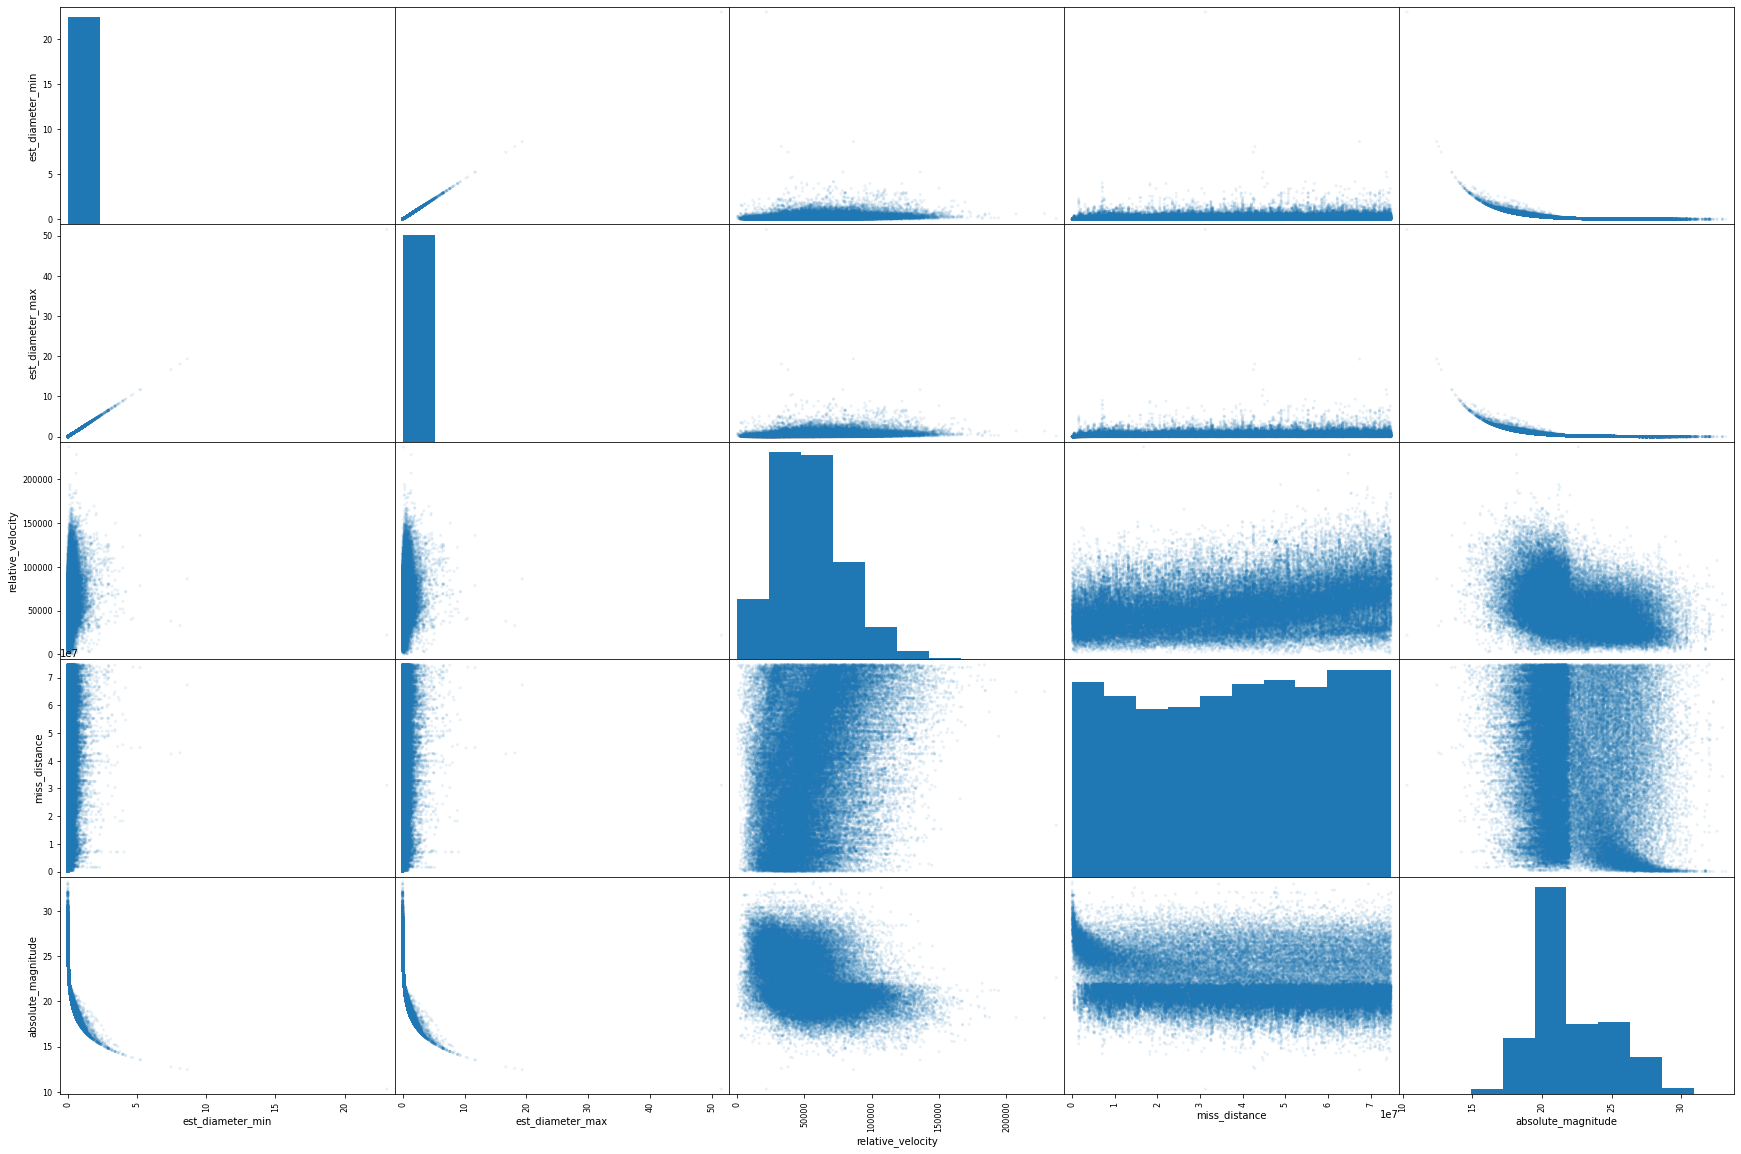

In [27]:
#Bivariate Analysis
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(30,20), alpha=0.1)
plt.show()

#### Bivariate analysis with regression line added

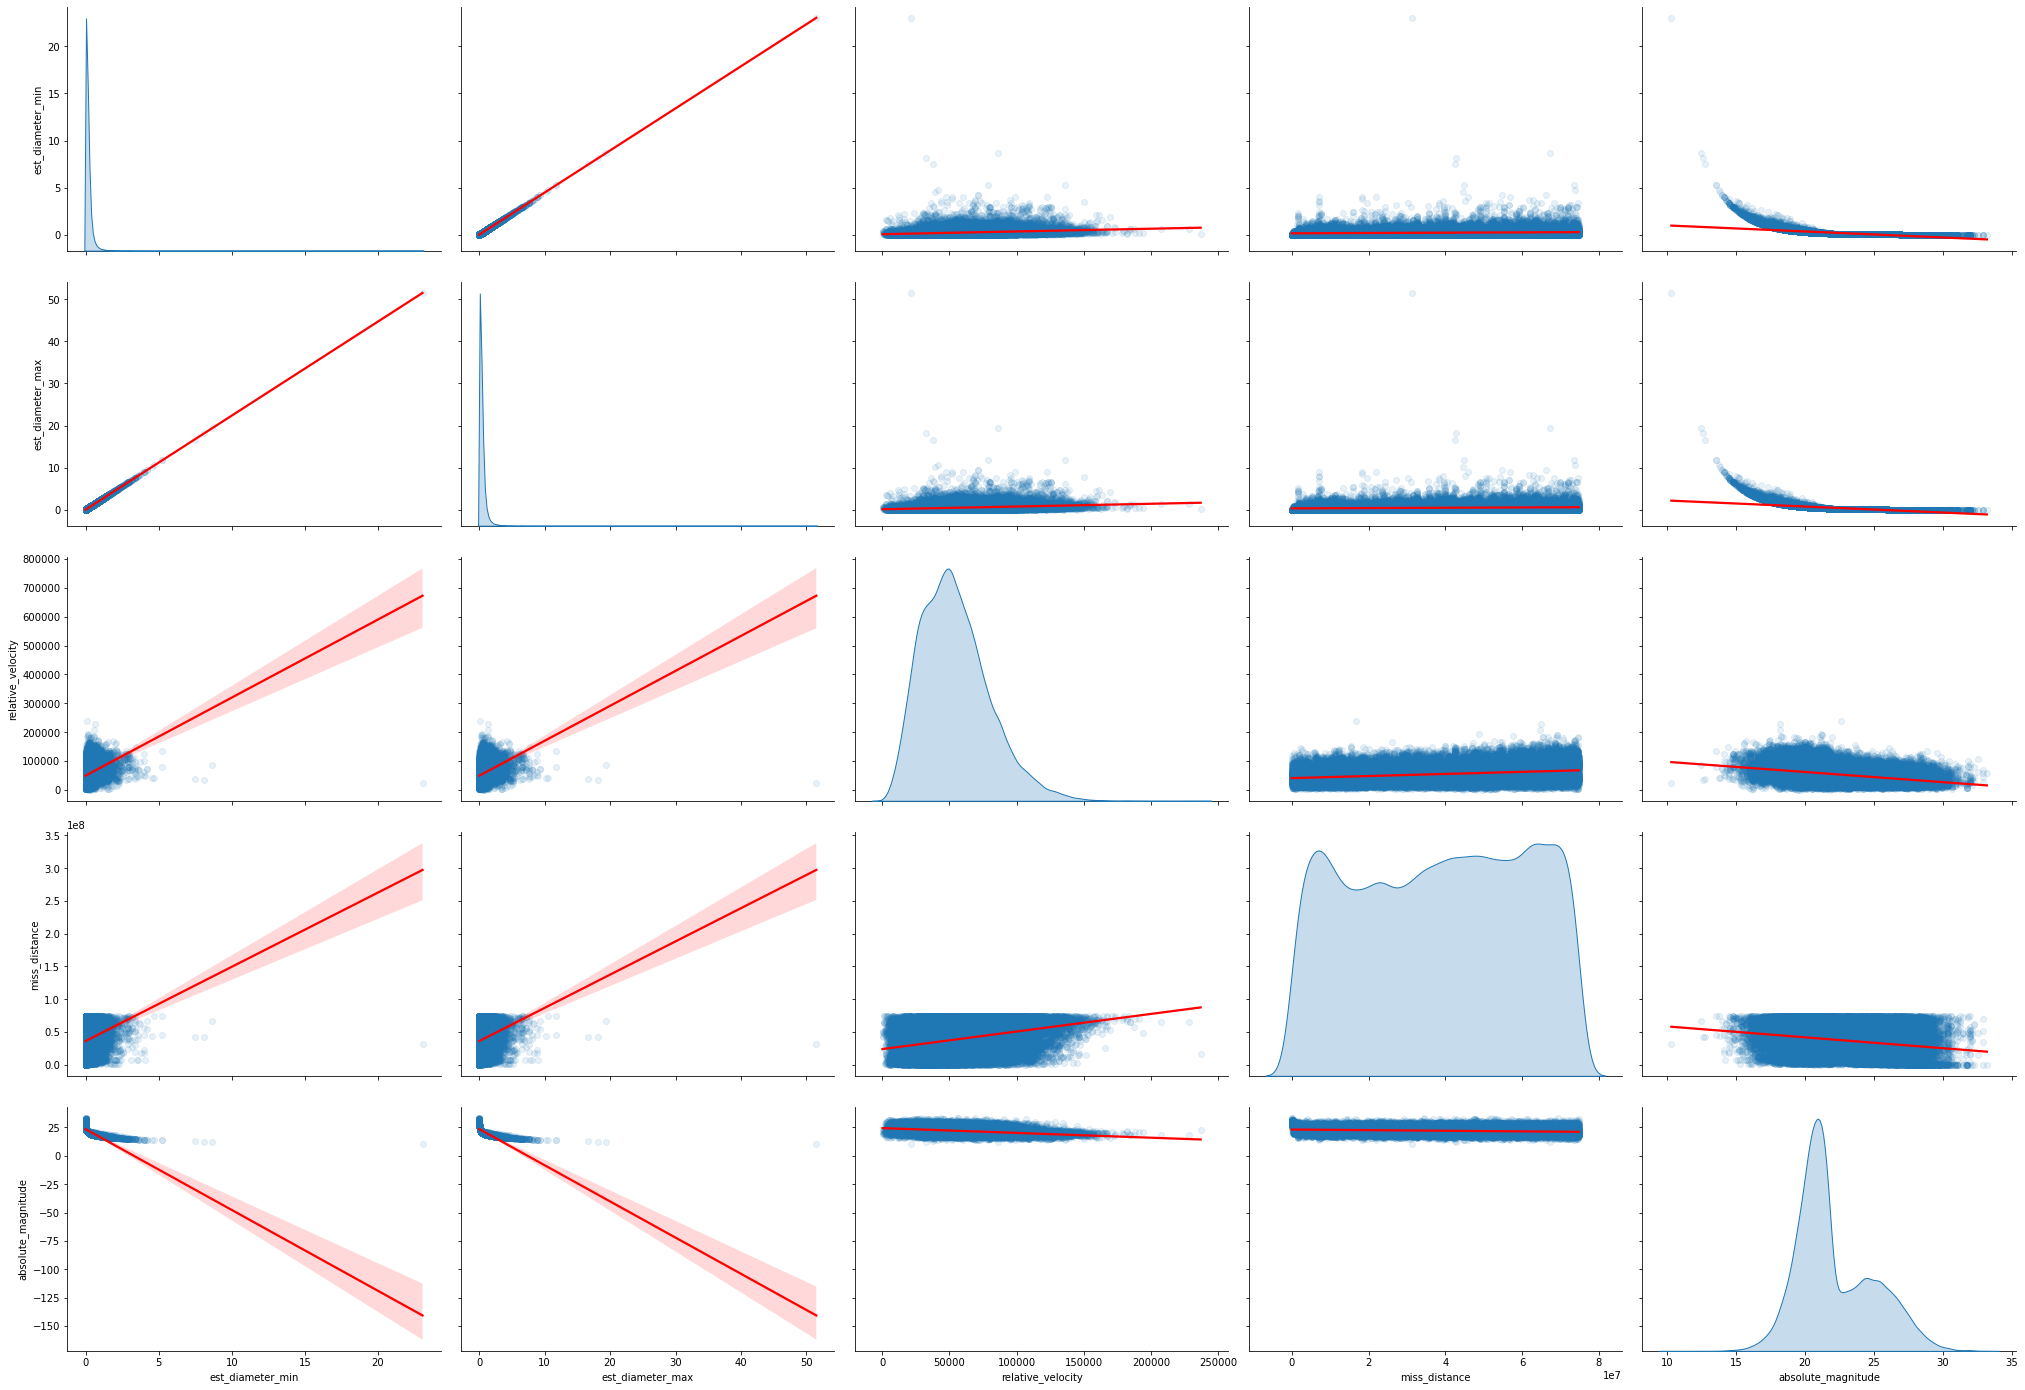

In [28]:
# Bivariate analysis with regression line added.
bivariate_plt = sns.pairplot(X_train, diag_kind="kde", kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.1}})
bivariate_plt.fig.set_size_inches(30,20)

#### Bivariate analysis showing distribution of hazardous planets.

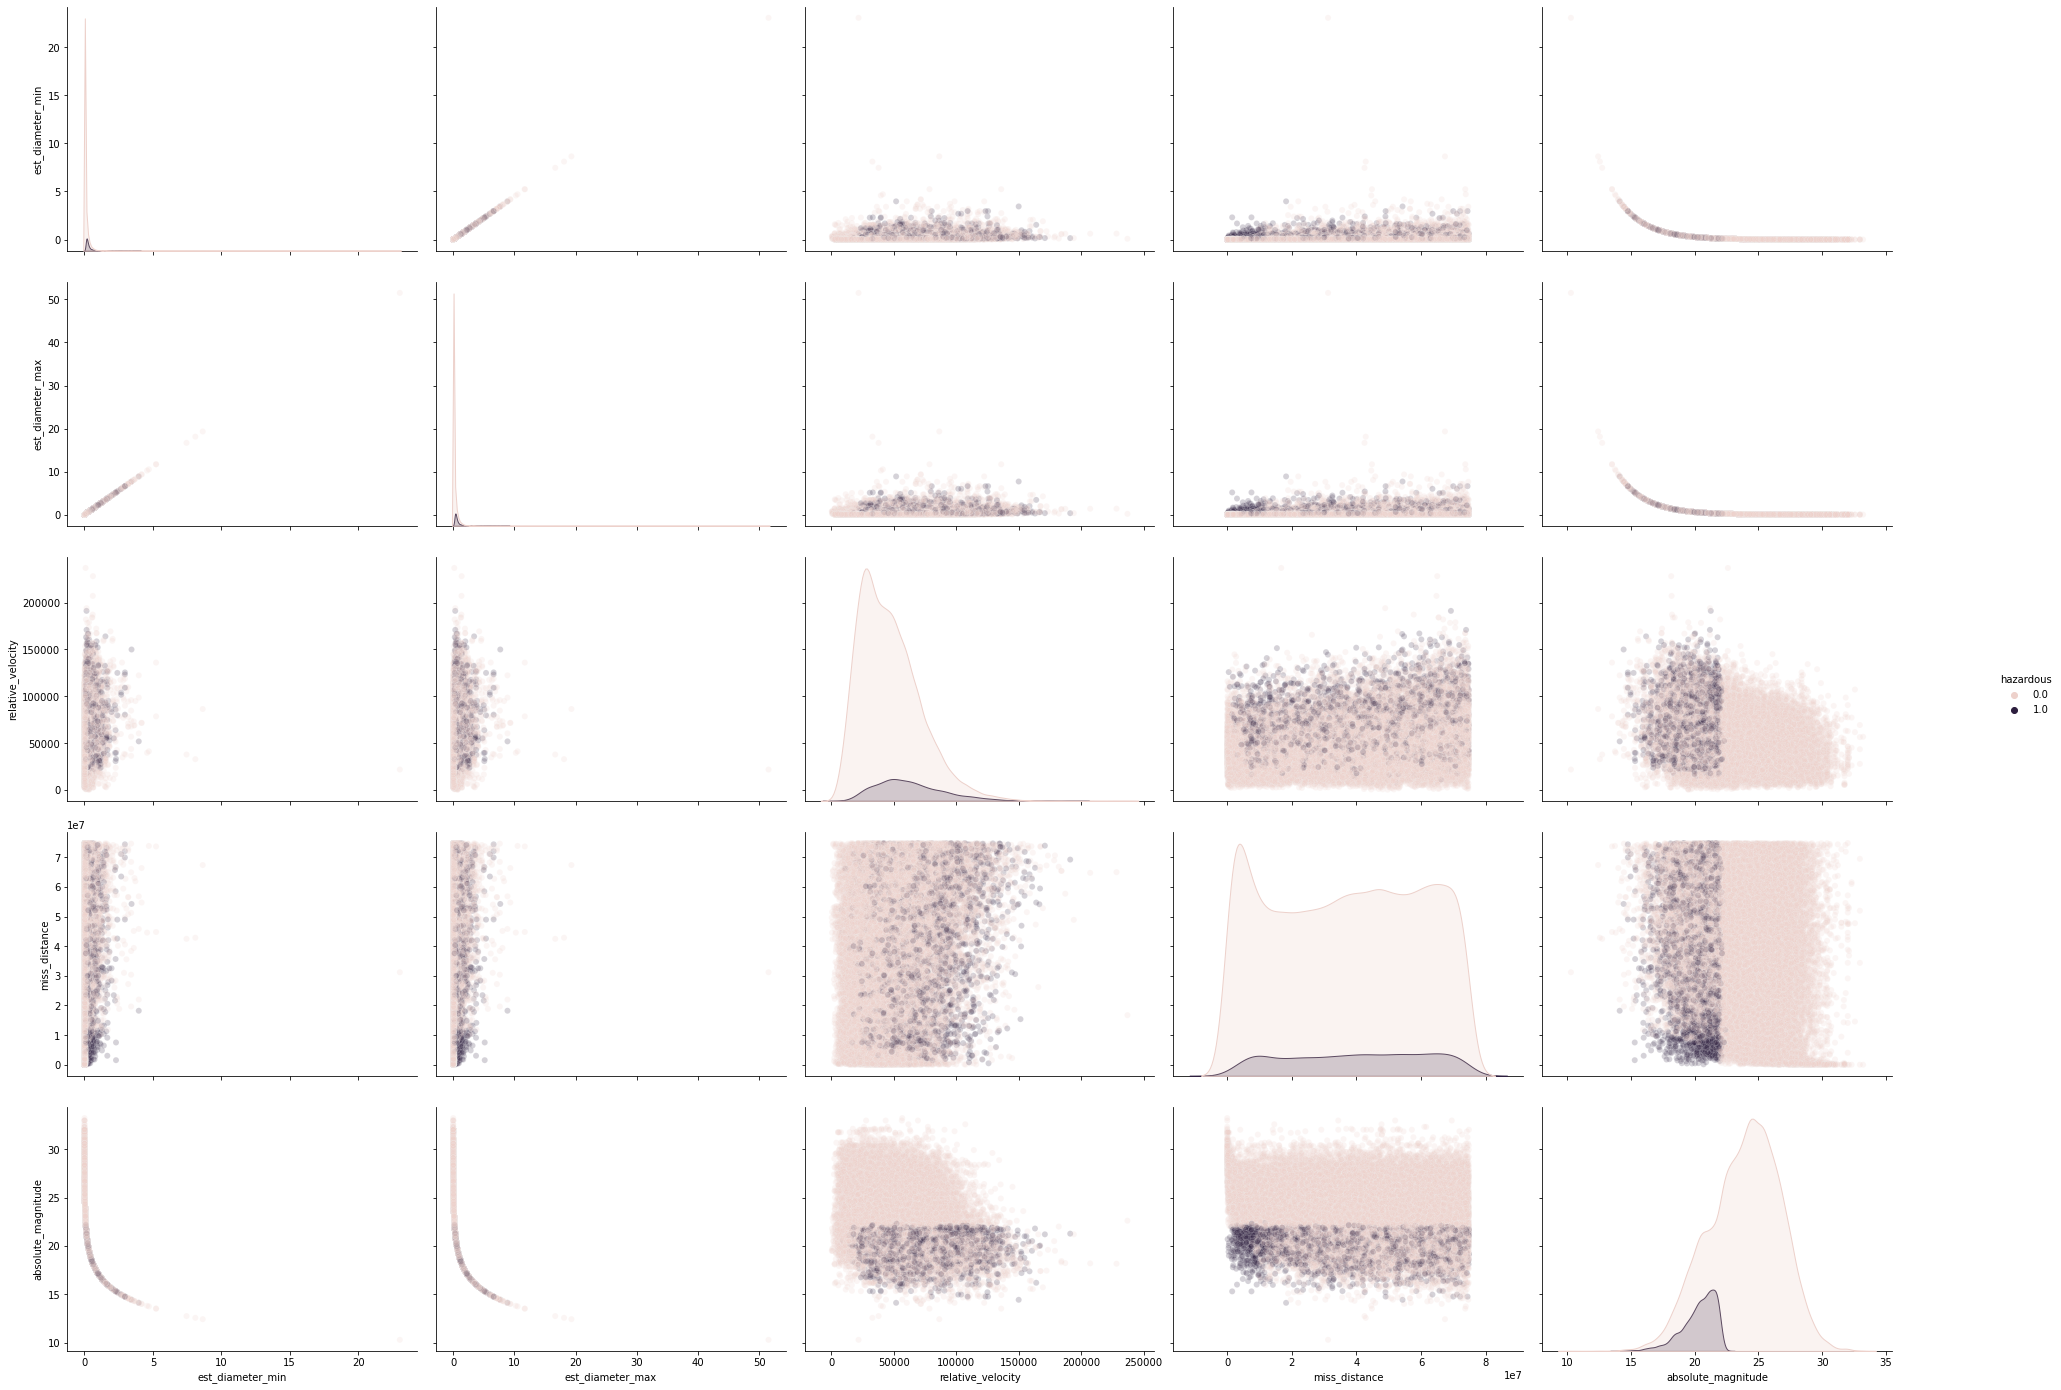

In [29]:
# Hazardous Planets in each plot
fig = sns.pairplot(X_train_with_hazardous, hue='hazardous',
             plot_kws={'alpha':0.2})
fig.fig.set_size_inches(30,20)

# Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.
Outcome is a probability so dependent variable is bound between 0 and 1.

In [30]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_reg, Y_train_reg) 
lr_pred = model_lr.predict(x_test_reg)

## Evaluating Logistic Regression model

In [31]:
#To check the accuracy of Logistic Regression
lr_accuracy= model_lr.score(x_test_reg,y_test_reg)
print("Accuracy:" + str(lr_accuracy))
lr_confusion_model= pd.crosstab(lr_pred,y_test_reg)
print(lr_confusion_model)
print(classification_report(y_test_reg,lr_pred,zero_division=1))

Accuracy:0.9016249064247656
hazardous  False  True
row_0                 
False      40950  4468
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     40950
        True       1.00      0.00      0.00      4468

    accuracy                           0.90     45418
   macro avg       0.95      0.50      0.47     45418
weighted avg       0.91      0.90      0.85     45418



# Random Forest Classifier
 A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [32]:
#Random Forest Classifier
model_RFC=RandomForestClassifier()
model_RFC.fit(X_train,Y_train)
prediction_RFC = model_RFC.predict(x_test)
print(prediction)
print(y_test)

[ True  True False ... False  True  True]
115328     True
157203     True
53313     False
12637     False
84644     False
          ...  
77358     False
126517     True
81990      True
94499      True
56247     False
Name: hazardous, Length: 81996, dtype: bool


## Evaluating Random Forest Classifier

In [33]:
# To check the accuracy
accuracy= model_RFC.score(x_test,y_test)
print(accuracy)

0.9469974145080248


In [34]:
# Display Confusion Matrix
confusion_model= pd.crosstab(prediction_RFC,y_test)
print(confusion_model)
print(classification_report(y_test,prediction_RFC))

hazardous  False   True
row_0                  
False      38719   2069
True        2277  38931
              precision    recall  f1-score   support

       False       0.95      0.94      0.95     40996
        True       0.94      0.95      0.95     41000

    accuracy                           0.95     81996
   macro avg       0.95      0.95      0.95     81996
weighted avg       0.95      0.95      0.95     81996



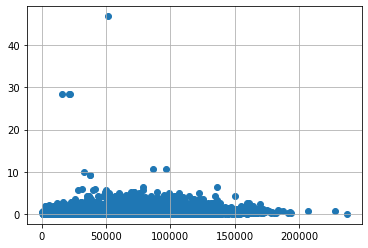

In [35]:
%matplotlib inline
plt.scatter(X['relative_velocity'], (X['est_diameter_max'] - X['est_diameter_min']))
plt.grid()
plt.show()

**Inference:** As the diameter of the object increases the velocity of the object decreases. Hence we can verify the scientific relation that holds true in our case as well.

# K-Nearest Neighbor Classifier
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [36]:
#KNN algorithm